In [208]:
import time

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
import missingno
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from catboost import CatBoostClassifier, Pool, cv


In [72]:
url_train = 'https://raw.githubusercontent.com/mo-amininasab/Titanic/master/data/train.csv'
url_test = 'https://raw.githubusercontent.com/mo-amininasab/Titanic/master/data/test.csv'
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [73]:
train.shape

(891, 12)

## Data Descriptions

- **Survival:** 0 = No, 1 = Yes
- **pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd
- **sex:** Sex
- **Age:** Age in years
- **sibsp:** number of siblings/spouses aboard the Titanic
- **parch:** number of parents/children aboard the Titanic
- **ticket:** Ticket number
- **fare:** Passenger fare
- **cabin:** Cabin number
- **embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [74]:
train.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing value

In [77]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

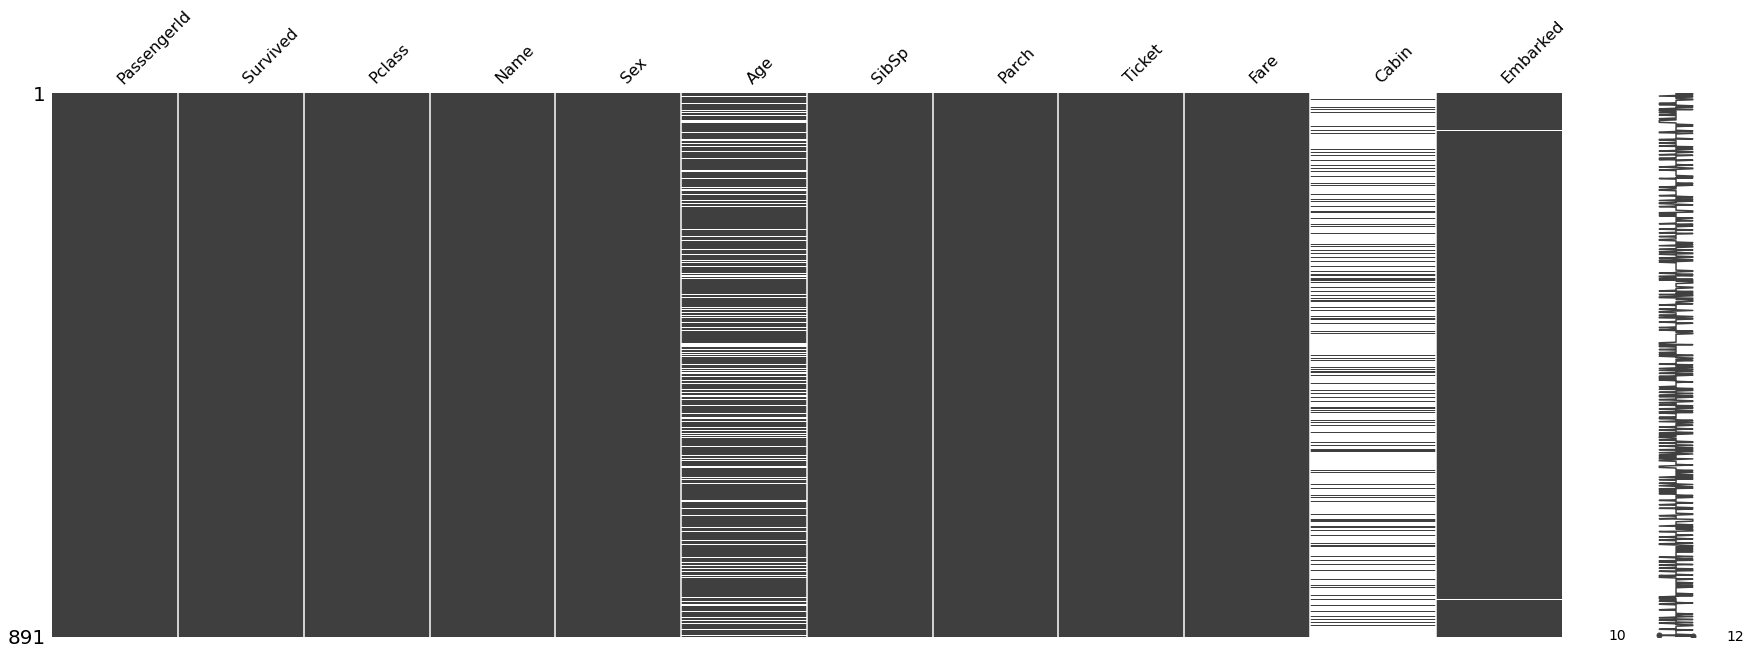

In [78]:
missingno.matrix(train, figsize=(30, 10))

In [79]:
train.drop('Cabin', axis=1, inplace=True)

In [80]:
train.dropna(subset=['Embarked'], axis=0, inplace=True)

<AxesSubplot:>

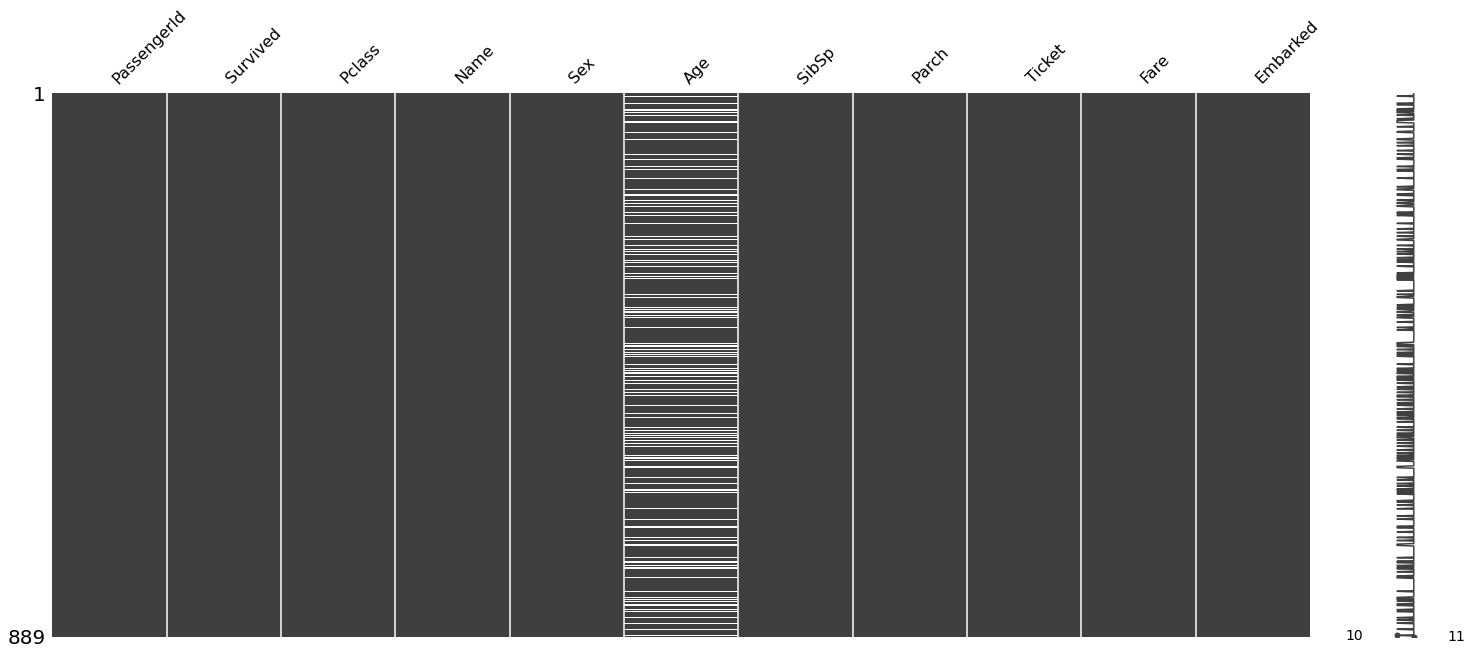

In [81]:
missingno.matrix(train)

<AxesSubplot:>

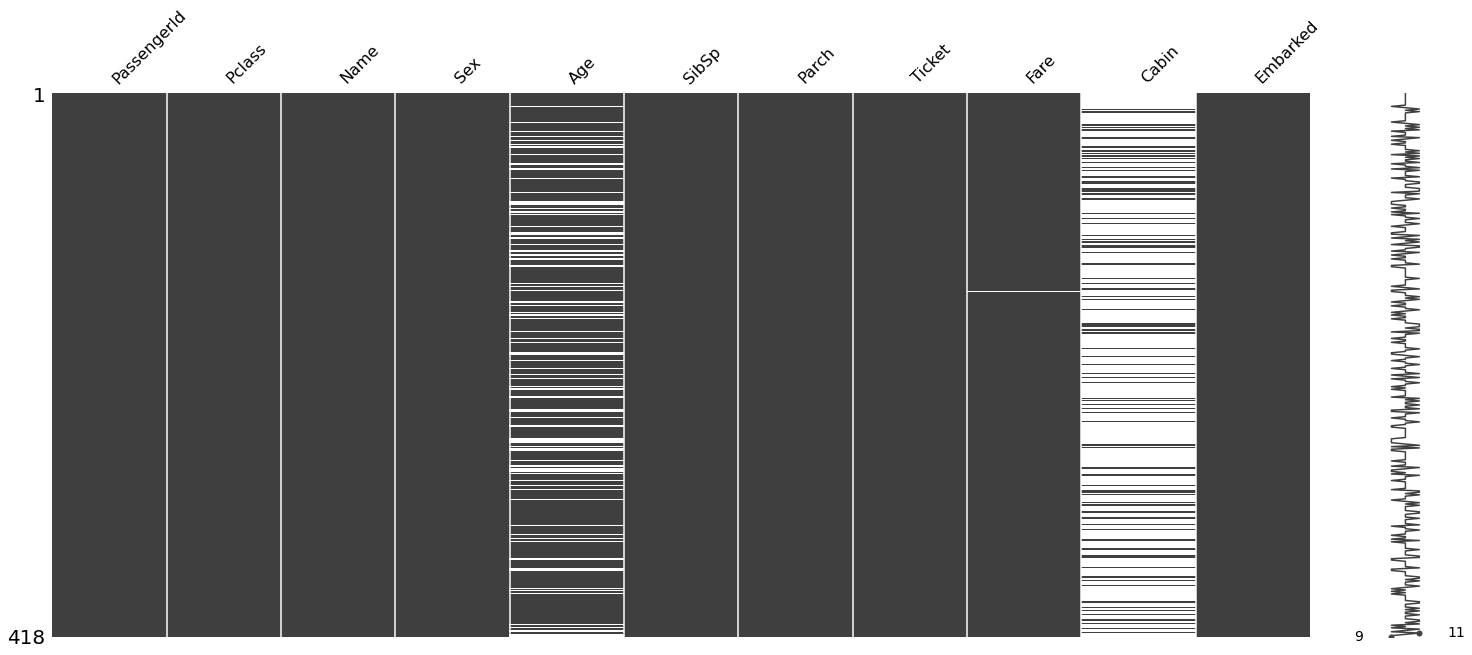

In [83]:
missingno.matrix(test)

## EDA

In [34]:
def count_plot(feature):
  fig = plt.figure(figsize=(20, 1))
  data = train[feature]
  sns.countplot(y=data)
  print(data.value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


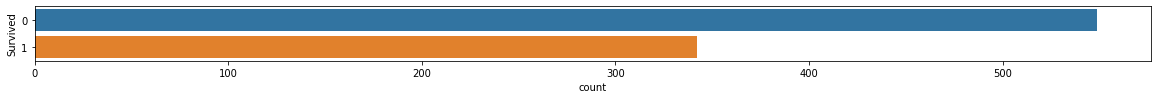

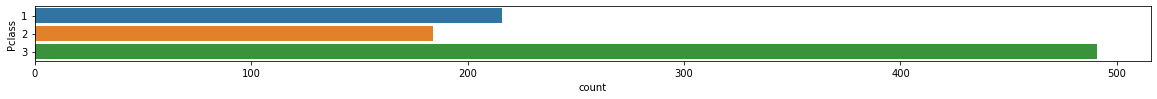

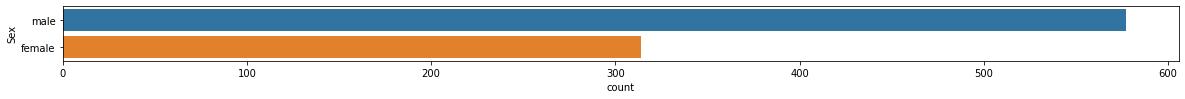

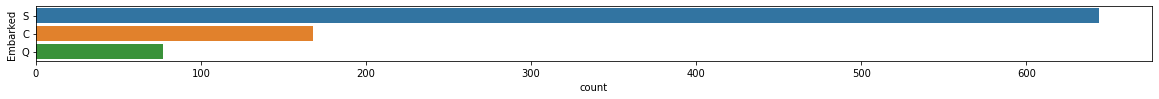

In [36]:
cat_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in cat_features:
  count_plot(feature)

# d

In [158]:
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
# numerical_cols = [cname for cname in X_train_full.columns if
# X_train_full[cname].dtype in ['int64', 'float64']]
cat_features = ['Pclass', 'Sex', 'Embarked']
# categorical_cols = [cname for cname in X_train_full.columns if
#                     X_train_full[cname].nunique() < 10 and
#                     X_train_full[cname].dtype == "object"]

# my_cols = categorical_cols + numerical_cols

num_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                                ('scaler', StandardScaler())])

cat_transformer = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ],
)

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
],
                                 remainder='drop',
                                 n_jobs=-1)

In [160]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [161]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    train_size=3/4,
    random_state=42,
)

## Logistic Regression

In [172]:
params = {
    # 'log_reg__penalty': ['l1', 'l2', 'elasticnet'],
    'log_reg__random_state': [42],
    'log_reg__C': [0.01, 0.1, 1, 10, 100, 1000],
    'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

est = Pipeline([('preprocessor', preprocessor),
                ('log_reg', LogisticRegression())])

search = GridSearchCV(est, params, n_jobs=-1)

In [173]:
search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                        

In [174]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [166]:
search.score(X_val, y_val)

0.7937219730941704

## KNN

In [179]:
params = {
    'knn__n_neighbors': [2, 3, 5, 7, 10, 13, 15, 20],
}

est = Pipeline([('preprocessor', preprocessor),
                ('knn', KNeighborsClassifier())])

search = GridSearchCV(est, params, n_jobs=-1)

In [180]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [181]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [182]:
search.score(X_val, y_val)

0.7847533632286996

## Gaussian Naive Bayes

In [186]:
params = {
    
}

est = Pipeline([('preprocessor', preprocessor),
                ('gbn', GaussianNB())])

search = GridSearchCV(est, params, n_jobs=-1)

In [187]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [188]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [189]:
search.score(X_val, y_val)

0.7713004484304933

## Stochastic Gradient Descent

In [190]:
params = {
    'sgd__random_state': [42],
    'sgd__loss': ['hinge', 'log_loss', 'log'],
    'sgd__penalty': ['l1', 'l2', 'elasticnet'],
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'sgd__learning_rate': ['optimal', 'invscaling', 'adaptive']
}

est = Pipeline([('preprocessor', preprocessor),
                ('sgd', SGDClassifier())])

search = GridSearchCV(est, params, n_jobs=-1)

In [191]:
search.fit(X_train, y_train)

c:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-package

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [192]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [193]:
search.score(X_val, y_val)

0.7937219730941704

## Decision Tree Classifier

In [198]:
params = {
    # 'dt__random_state': [42],
    # 'dt__criterion': ['gini', 'entropy', 'log_loss']
}

est = Pipeline([('preprocessor', preprocessor),
                ('dt', DecisionTreeClassifier())])

search = GridSearchCV(est, params, n_jobs=-1)

In [199]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [200]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [201]:
search.score(X_val, y_val)

0.7623318385650224

## Gaussian Naive Bayes

In [ ]:
params = {
    
}

est = Pipeline([('preprocessor', preprocessor),
                ('gbn', GaussianNB())])

search = GridSearchCV(est, params, n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [ ]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [ ]:
search.score(X_val, y_val)

0.7713004484304933

## Gradient Boost Trees

In [202]:
params = {
    
}

est = Pipeline([('preprocessor', preprocessor),
                ('gbt', GradientBoostingClassifier())])

search = GridSearchCV(est, params, n_jobs=-1)

In [203]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [204]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [205]:
search.score(X_val, y_val)

0.8161434977578476

## CatBoost Algorithm

In [ ]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

train_pool = Pool(X_train, y_train, cat_features)

In [215]:
catboost_model.fit(train_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.008661
0:	learn: 0.6878253	total: 93.7ms	remaining: 1m 33s
1:	learn: 0.6824441	total: 123ms	remaining: 1m 1s
2:	learn: 0.6769139	total: 151ms	remaining: 50.1s
3:	learn: 0.6721830	total: 180ms	remaining: 44.7s
4:	learn: 0.6676489	total: 197ms	remaining: 39.1s
5:	learn: 0.6623898	total: 226ms	remaining: 37.4s
6:	learn: 0.6566726	total: 259ms	remaining: 36.8s
7:	learn: 0.6520260	total: 279ms	remaining: 34.6s
8:	learn: 0.6479968	total: 307ms	remaining: 33.8s
9:	learn: 0.6446032	total: 326ms	remaining: 32.3s
10:	learn: 0.6403831	total: 345ms	remaining: 31s
11:	learn: 0.6364839	total: 358ms	remaining: 29.5s
12:	learn: 0.6322440	total: 392ms	remaining: 29.8s
13:	learn: 0.6279840	total: 433ms	remaining: 30.5s
14:	learn: 0.6240564	total: 475ms	remaining: 31.2s
15:	learn: 0.6199529	total: 512ms	remaining: 31.5s
16:	learn: 0.6160824	total: 545ms	remaining: 31.5s
17:	learn: 0.6123987	total: 563ms	remaining: 30.7s
18:	learn: 0.6088248	total: 587ms	remaining: 30.3s
19:	learn: 

In [216]:
catboost_model.score(X_train, y_train)

0.8948948948948949

In [217]:
# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6741522	test: 0.6769428	best: 0.6769428 (0)	total: 23.2ms	remaining: 23.1s
1:	learn: 0.6565340	test: 0.6626373	best: 0.6626373 (1)	total: 70.6ms	remaining: 35.2s
2:	learn: 0.6418727	test: 0.6503523	best: 0.6503523 (2)	total: 93.5ms	remaining: 31.1s
3:	learn: 0.6287746	test: 0.6397849	best: 0.6397849 (3)	total: 107ms	remaining: 26.8s
4:	learn: 0.6155671	test: 0.6305053	best: 0.6305053 (4)	total: 143ms	remaining: 28.4s
5:	learn: 0.6027808	test: 0.6190280	best: 0.6190280 (5)	total: 175ms	remaining: 29s
6:	learn: 0.5900867	test: 0.6085199	best: 0.6085199 (6)	total: 198ms	remaining: 28.1s
7:	learn: 0.5790700	test: 0.5980937	best: 0.5980937 (7)	total: 228ms	remaining: 28.2s
8:	learn: 0.5694204	test: 0.5890949	best: 0.5890949 (8)	total: 258ms	remaining: 28.5s
9:	learn: 0.5594663	test: 0.5803571	best: 0.5803571 (9)	total: 283ms	remaining: 28s
10:	learn: 0.5508841	test: 0.5730877	best: 0.5730877 (10)	total: 311ms	remaining: 27.9s
11:	learn: 0.5428009	test: 0.

In [220]:
np.max(cv_data['test-Accuracy-mean'])

0.836073478760046

## Gaussian Naive Bayes

In [ ]:
params = {
    
}

est = Pipeline([('preprocessor', preprocessor),
                ('gbn', GaussianNB())])

search = GridSearchCV(est, params, n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                            

In [ ]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                         

In [ ]:
search.score(X_val, y_val)

0.7713004484304933